[]

         timestamp      Loss       Acc                            exp Round
0    1663223997608  0.128838  0.927639  Client: 1 Extrasensory umap 5     0
1    1663224003542  0.081583  0.932593  Client: 1 Extrasensory umap 5     1
2    1663224009488  0.054672  0.938022  Client: 1 Extrasensory umap 5     2
3    1663224015421  0.071670  0.940313  Client: 1 Extrasensory umap 5     3
4    1663224021248  0.084912  0.942025  Client: 1 Extrasensory umap 5     4
..             ...       ...       ...                            ...   ...
145  1663225725126  0.047523  0.919049  Client: 1 Extrasensory umap 3    25
146  1663225731108  0.047217  0.919049  Client: 1 Extrasensory umap 3    26
147  1663225736897  0.046086  0.919333  Client: 1 Extrasensory umap 3    27
148  1663225742723  0.046357  0.919177  Client: 1 Extrasensory umap 3    28
149  1663225748580  0.045585  0.918647  Client: 1 Extrasensory umap 3    29

[150 rows x 5 columns]


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


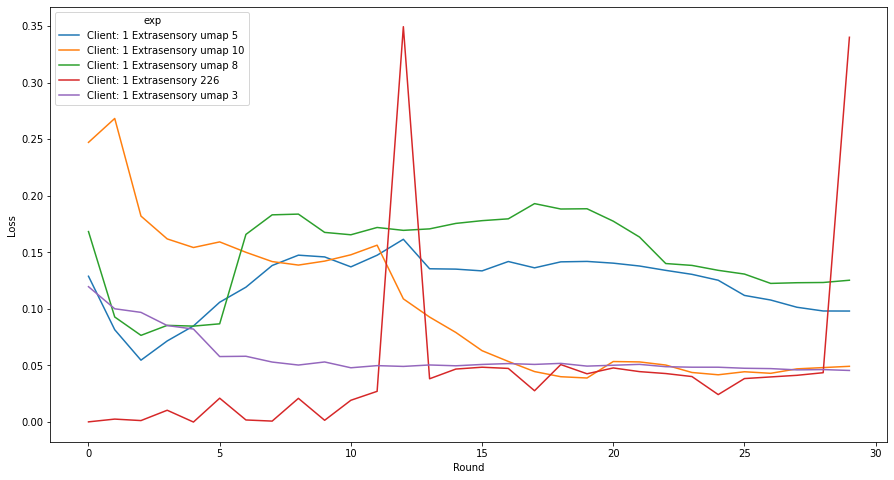

<Figure size 432x288 with 0 Axes>

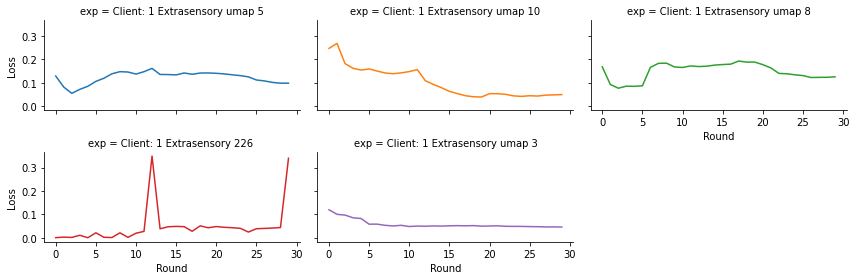

<Figure size 432x288 with 0 Axes>

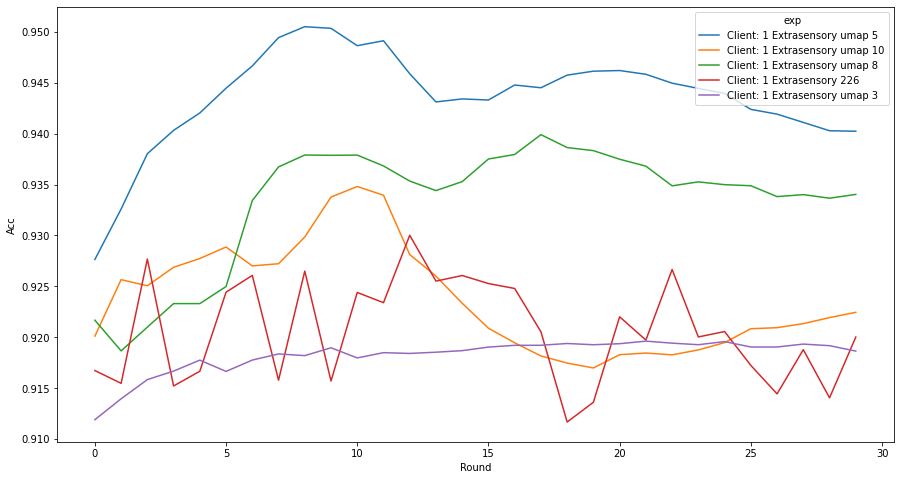

<Figure size 432x288 with 0 Axes>

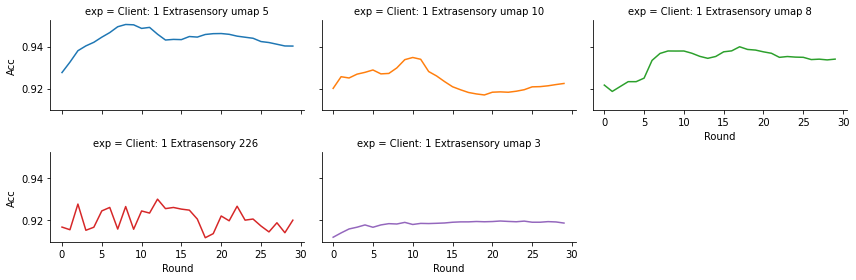

<Figure size 432x288 with 0 Axes>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import glob
# All files and directories ending with .txt and that don't begin with a dot:
print(glob.glob("/home/adam/*.txt")) 
# All files and directories ending with .txt with depth of 2 folders, ignoring names beginning with a dot:
print() 

exps=glob.glob("Extrasensory/client0/learning/*.txt")
client="1"
def get_training_exp(fileName):  
    df = pd.read_csv(fileName,sep=';')    
    return df

frame_training=[]
for exp in exps:
    df=get_training_exp(exp) 
    dataset=exp.split("_")[1] 
    embedding=exp.split("_")[2] 
    if(embedding=="umap"):
        umap=exp.split("_")[3]
    else:
        umap=""
    if(embedding=="extrasensory"):
        embedding="226"   
    df['exp'] ="Client: "+client + " "+ dataset+ ' ' + embedding + ' ' + umap
    df['Round'] = df.index
    frame_training.append(df.values) 
frs=np.concatenate((frame_training), axis=0)
df_all_training =pd.DataFrame(data=frs)   
df_all_training.columns = ['timestamp','Loss','Acc',"exp","Round"]

def getAcc(x):
    return float(x.split(";")[1])
def getLoss(x):
    return float(x.split(";")[0])

df_all_training['Acc'] = df_all_training.apply(lambda row: getAcc(row['Loss']), axis=1)

df_all_training['Loss'] = df_all_training.apply(lambda row: getLoss(row['Loss']), axis=1)


print(df_all_training)


plot_trainings = ['Loss','Acc']

for plot_training in plot_trainings:
  test =plot_training
  plt.figure(figsize=(15,8))
  sns.lineplot(
      data=df_all_training, x="Round", y=test,
      hue="exp",ci=None,
      legend="full"
  )
  plt.figure()

  g = sns.FacetGrid(df_all_training, col='exp',hue="exp",size=2,aspect=2, height=15,col_wrap=3)

  g = g.map(sns.lineplot, 'Round', test, ci=None)

  plt.figure()







  
